<a href="https://colab.research.google.com/github/yachika-yashu/Machine-learning/blob/main/Multiple_linear_regression_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression

In [30]:
df = pd.read_csv('/content/Nat_Gas.csv', parse_dates=['Dates'])

df['Dates'] = pd.to_datetime(df['Dates'], format='%m/%d/%y')
df.head()

<ipython-input-30-d3756a76540d>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('/content/Nat_Gas.csv', parse_dates=['Dates'])


,Dates,Prices
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


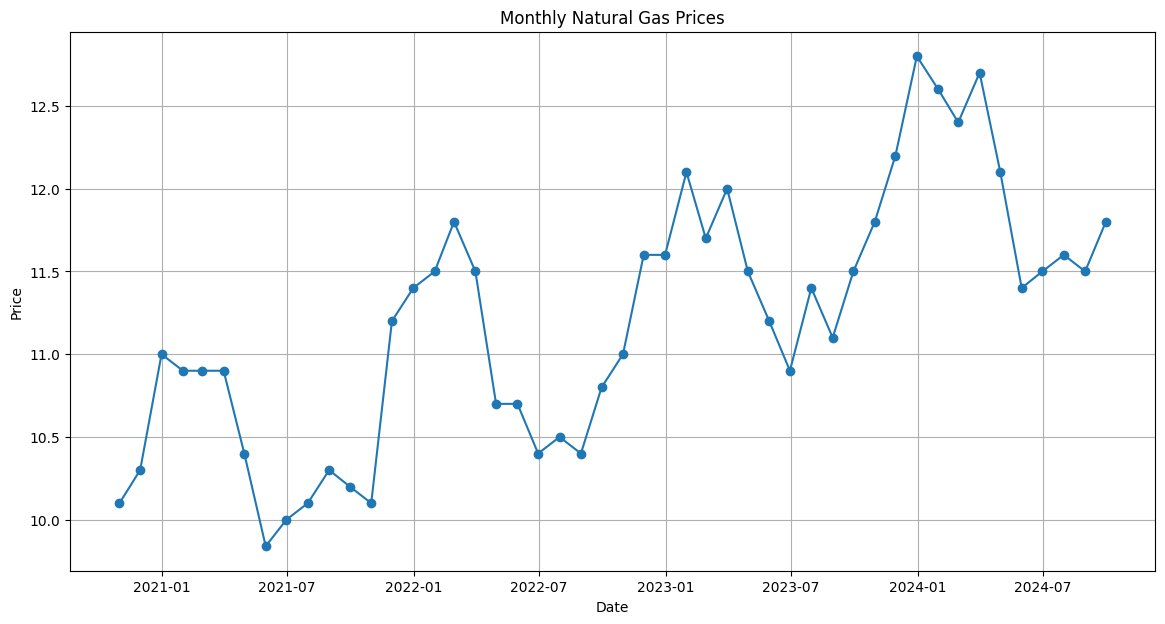

In [31]:
# Visualize the data
plt.figure(figsize=(14,7))
plt.plot(df['Dates'], df['Prices'], marker='o')
plt.title('Monthly Natural Gas Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [32]:

# Prepare data for linear regression model
df['Days'] = (df['Dates'] - df['Dates'].min()).dt.days #Calculates the number of days since the first date in the dataset.
X = df[['Days']] #Features for the regression model (number of days).
y = df['Prices']
# Train the linear regression model
lr = LinearRegression()
lr.fit(X, y)


LinearRegression()

In [33]:

# Extrapolate prices for one year into the future
future_dates = [df['Dates'].max() + timedelta(days=i*30) for i in range(1,13)] #Generates dates for the next 12 months.
future_days = [(date - df['Dates'].min()).days for date in future_dates] #Calculates the number of days since the first date for future dates.
future_prices = model.predict(np.array(future_days).reshape(-1,1)) #Predicts prices for future dates.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


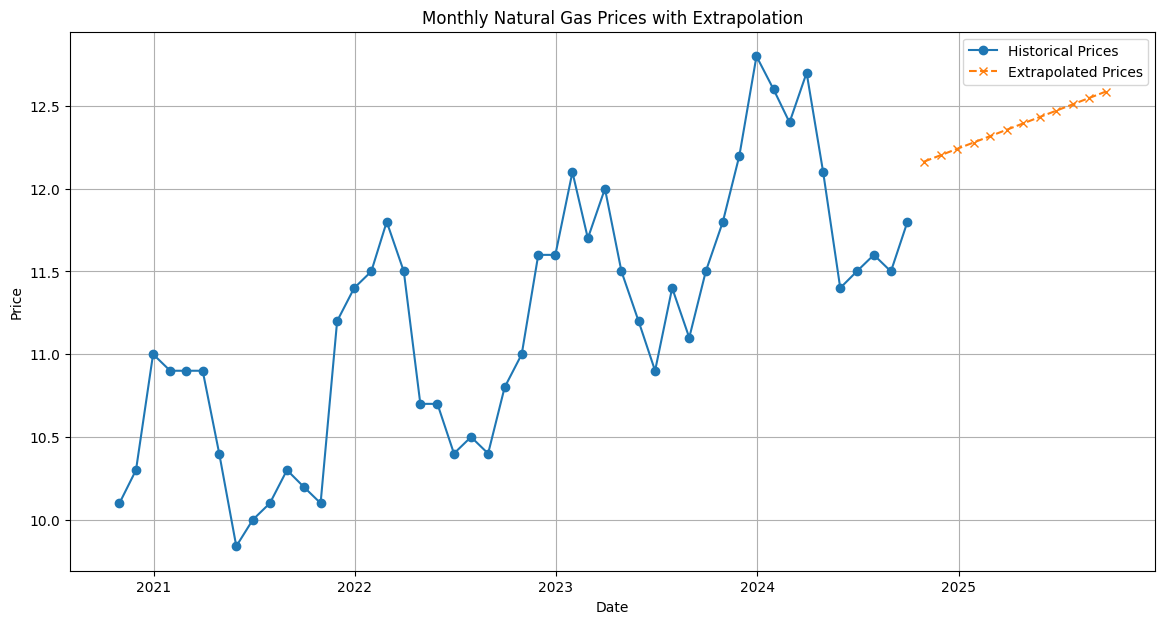

In [34]:

  #Visualize extrapolated prices
plt.figure(figsize=(14,7))
plt.plot(df['Dates'], df['Prices'], marker='o', label='Historical Prices')
plt.plot(future_dates, future_prices, marker='x', linestyle='--', label='Extrapolated Prices')
plt.title('Monthly Natural Gas Prices with Extrapolation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [35]:

# Function to estimate price on a given date
def estimate_price(date_str):
    date = datetime.strptime(date_str, '%m/%d/%y') #Converts the date string into a datetime object.
    days = (date - df['Dates'].min()).days # Calculates the number of days since the first date.
    estimated_price = lr.predict([[days]])[0] #Predicts the price using the trained model.
    return estimated_price

In [36]:

# Example usage of estimate_price function
example_date = '12/15/23'
estimated_price = estimate_price(example_date)
print(f"The estimated price of natural gas on {example_date} is {estimated_price:.2f}.")


The estimated price of natural gas on 12/15/23 is 11.75.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
